In [1]:
import numpy as np
import pandas as pd

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

Using TensorFlow backend.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

fundamentals.csv
prices-split-adjusted.csv
prices.csv
securities.csv



In [3]:
prices_dataset =  pd.read_csv('../input/prices.csv', header=0)

In [4]:
yahoo = prices_dataset[prices_dataset['symbol']=='YHOO']
yahoo_stock_prices = yahoo.close.values.astype('float32')
yahoo_stock_prices = yahoo_stock_prices.reshape(1762, 1)
yahoo_stock_prices.shape

(1762, 1)

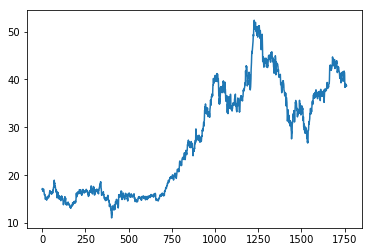

In [5]:
plt.plot(yahoo_stock_prices)
plt.show()

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
yahoo_stock_prices = scaler.fit_transform(yahoo_stock_prices)

In [7]:
train_size = int(len(yahoo_stock_prices) * 0.80)
test_size = len(yahoo_stock_prices) - train_size
train, test = yahoo_stock_prices[0:train_size,:], yahoo_stock_prices[train_size:len(yahoo_stock_prices),:]

In [8]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        b = dataset[i+look_back,0]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

In [9]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)

In [10]:
testX, testY = create_dataset(test, look_back)

In [11]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=10,
    validation_split=0.05)

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
/opt/conda/lib/python3.6/site-packages/Keras-2.0.4-py3.6.egg/keras/models.py:849: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/opt/conda/lib/python3.6/site-packages/Keras-2.0.4-py3.6.egg/keras/backend/tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


compilation time :  0.023167133331298828
Train on 1336 samples, validate on 71 samples
Epoch 1/10
1336/1336 [==============================] - 0s - loss: 0.1321 - val_loss: 0.2881
Epoch 2/10
1336/1336 [==============================] - 0s - loss: 0.0691 - val_loss: 0.1418
Epoch 3/10
1336/1336 [==============================] - 0s - loss: 0.0392 - val_loss: 0.0627
Epoch 4/10
1336/1336 [==============================] - 0s - loss: 0.0280 - val_loss: 0.0341
Epoch 5/10
1336/1336 [==============================] - 0s - loss: 0.0187 - val_loss: 0.0172
Epoch 6/10
1336/1336 [==============================] - 0s - loss: 0.0094 - val_loss: 0.0058
Epoch 7/10
1336/1336 [==============================] - 0s - loss: 0.0036 - val_loss: 0.0016
Epoch 8/10
1336/1336 [==============================] - 0s - loss: 0.0019 - val_loss: 3.8543e-04
Epoch 9/10
1336/1336 [==============================] - 0s - loss: 0.0019 - val_loss: 9.1763e-04
Epoch 10/10
1336/1336 [==============================] - 0s - loss: 

In [13]:
def plot_results_multiple(predicted_data, true_data, length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()

In [14]:
def predict_sequences_multiple(model, firstValue, length):
    prediction_seqs = []
    curr_frame = firstValue

    for i in range(length):
        predicted = []

        predicted.append(model.predict(curr_frame[newaxis, :, :])[0, 0])

        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i + 1, predicted[-1], axis=0)

        prediction_seqs.append(predicted[-1])

    return prediction_seqs

/opt/conda/lib/python3.6/site-packages/Keras-2.0.4-py3.6.egg/keras/backend/tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


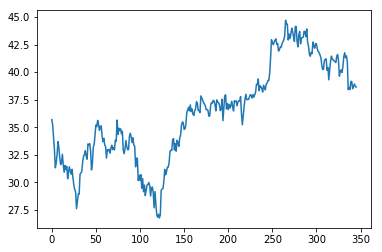

In [15]:
predict_length = 5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
plot_results_multiple(predictions, testY, predict_length)